<a href="https://colab.research.google.com/github/Guilherme-Brasil/Dijkstra-and-A-algorithm-comparison/blob/main/Dijkstra_and_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Dijkstra's algorithm and A**** ***comparison***



> Author: Guilherme Araújo Brasil

> 2023.2




###Dijkstra's algorithm is a good algorithm, but its search method requires a long running time. To find the lowest cost path between two points, the algorithm traverses a very large area of ​points to find the correct path, which requires a good amount of processing time.

###On the other hand, when analyzing the A* algorithm, we can see that its search time is much smaller than the Dijkstra's algorithm, making its use more advantageous. The method used analyzes points close to the lowest cost path and not a very large area.

###A* tries to look for a better path by using a heuristic function, which gives priority to nodes that are supposed to be better than others while Dijkstra's just explore all possible ways. A* uses an additional heuristic function in the cost calculation to inform its search. The heuristic function acts as a hint to guide the algorithm towards the destination, and hopefully reducing the search space. Heuristics are admissible calculations within the scope of the work. There are several formulas that can be implemented in the algorithm under study.

###The differential for the Dijkstra's algorithm is that, in addition to analyzing the cost of the edges between the points, the A* algorithm will calculate the distance between the current point of study and the destination point, giving preference to the point geographically closer to the end point . This reduces processing time and memory usage by the CPU.

###In the image below, we can see the difference between the two analyzed algorithms.


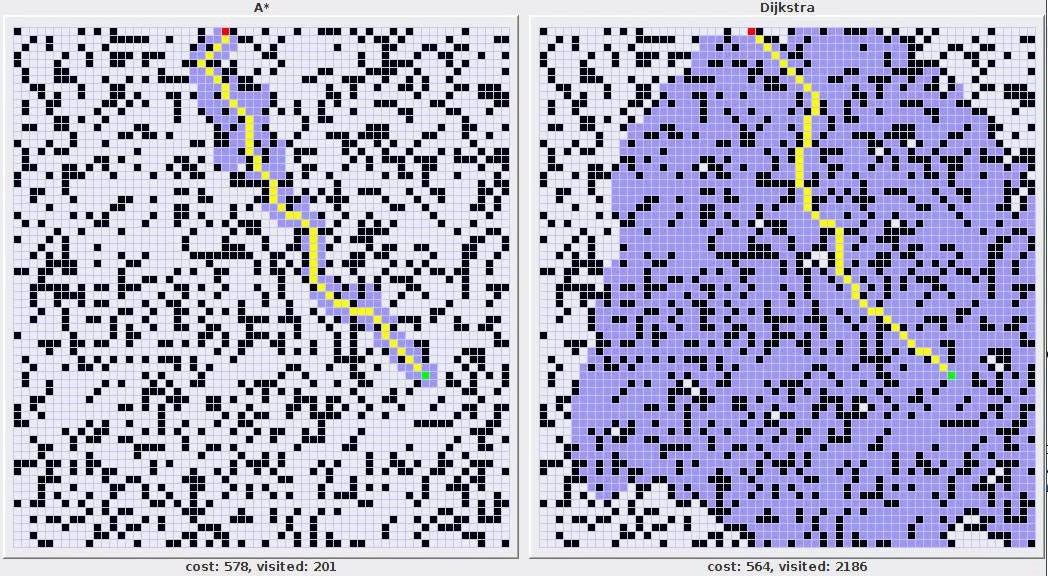

###In this work we will show the implementation of the Dijkstra's algorithm and the A* algorithm in a simple graph, where we will need to find the shortest path with the lowest possible cost going from vertex 0 or A to vertex 5 or F.
###At the end we will calculate the runtimes of the two implementations and compare them.

#**Dijkstra**

### **Dijkstra's Algorithm**

In [157]:
# Libraries
import heapq
import time

In [158]:
# Start time
startDij = time.time()

In [159]:
# Define a function to update priority in the heap
def change_priority(w, D, L):
    pos = None
    for i in range(len(D)):
        if D[i][1] == w:
            pos = i
            break
    if pos is not None:
        D[pos] = (L[w], w)
        heapq._siftdown(D, 0, pos)

In [160]:
# Cost matrix
cost = []
infnty = float('inf')  # Infinity number

In [161]:
# Defining cost matrix
n = 6  # Vertex number
for i in range(n):
    line = []
    for j in range(n):
        if i == j:
            line.append(0)
        else:
            line.append(infnty)
    cost.append(line)

In [162]:
# Output neighborhood
n_out = [[] for i in range(n)]

arcs = [
    (0, 1, 2),
    (0, 2, 10),
    (1, 3, 1),
    (1, 4, 9),
    (2, 5, 6),
    (3, 5, 12),
    (4, 0, 5),
    (5, 4, 2)
]

In [163]:
# Reading arcs
m = len(arcs)  # Arcs number
for j in range(m):
    a, b, c = arcs[j]
    n_out[a].append(b)
    cost[a][b] = c

In [164]:
# Unchecking vertices
check = n * [0]
L = n * [infnty]

In [165]:
# Root
root = 0
L[root] = 0

In [166]:
# Heap begins
D = [(0, root)]
for w in range(0, n):
    if w != root:
        heapq.heappush(D, (L[w], w))
prev = n * [-1]
while D:
    Lmin, v = heapq.heappop(D)
    if check[v] == 1:
        continue
    check[v] = 1
    for w in n_out[v]:
        if check[w] == 0:
            if L[v] + cost[v][w] < L[w]:
                L[w] = L[v] + cost[v][w]
                change_priority(w, D, L)
                prev[w] = v

In [167]:
# End time
finishDij = time.time()

In [168]:
# Find the shortest path from vertex 0 to vertex 5
path = []
curr = 5
while curr != -1:
    path.append(curr)
    curr = prev[curr]
path.reverse()

###**Shortest path and final cost**

In [169]:
# Print the path and cost
print("Shortest Path from vertex 0 to vertex 5:", path)
print("Cost of Shortest Path:", L[5])

Shortest Path from vertex 0 to vertex 5: [0, 1, 3, 5]
Cost of Shortest Path: 15


###**Dijkstra Traversal Steps**

In [170]:
# Print the steps of traversal
print("Traversal Steps:")
for i in range(len(path) - 1):
    print(f"From vertex {path[i]} to vertex {path[i+1]}, Cost = {cost[path[i]][path[i+1]]}")

Traversal Steps:
From vertex 0 to vertex 1, Cost = 2
From vertex 1 to vertex 3, Cost = 1
From vertex 3 to vertex 5, Cost = 12


###**Dijkstra run time**

In [171]:
# Calculate and print run time
totalDij = finishDij - startDij
print("Run time:", totalDij)

Run time: 0.12033867835998535


#**A***

###**A* Algorithm**


In [172]:
# Libraries
from collections import deque
import time

In [173]:
# Start time
startAStar = time.time()

In [174]:
# Libraries
from collections import deque
import time

# Start time
startAStar = time.time()

#Graph building
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis

    def get_neighbors(self, v):
        return self.adjac_lis[v]

    # Heuristic function with equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1,
            'E': 1,
            'F': 1
        }
        return H[n]

    def a_star_algorithm(self, start, stop):
        open_lst = set([start])
        closed_lst = set([])

        # Dictionary to store present distances from start to all other nodes
        # The default value is +infinity
        poo = {}
        poo[start] = 0

        # Dictionary to store parent mapping of all nodes
        par = {}
        par[start] = start

        while len(open_lst) > 0:
            n = None

            # Find a node with the lowest value of f()
            for v in open_lst:
                if n is None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v;

            if n is None:
                print('Path does not exist!')
                return None

            # If the current node is the stop node, reconstruct the path
            if n == stop:
                reconst_path = []

                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]

                reconst_path.append(start)
                reconst_path.reverse()
                return reconst_path

            # For all the neighbors of the current node
            for (m, weight) in self.get_neighbors(n):
                # If the current node is not in both open_lst and closed_lst
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight

                # Otherwise, check if it's quicker to first visit n, then m
                elif poo[m] > poo[n] + weight:
                    poo[m] = poo[n] + weight
                    par[m] = n

                    if m in closed_lst:
                        closed_lst.remove(m)
                        open_lst.add(m)

            # Remove n from the open_lst, and add it to closed_lst
            open_lst.remove(n)
            closed_lst.add(n)

        print('Path does not exist!')
        return None

In [175]:
# Output neighborhood
adjac_lis = {
    'A': [('B', 2), ('C', 10)],
    'B': [('D', 1), ('E', 9)],
    'C': [('F', 6)],
    'D': [('F', 12)],
    'E': [('A', 5)],
    'F': [('E', 2)]
}

In [176]:
# End time
finishAStar = time.time()

In [177]:
#Graph begins
graph1 = Graph(adjac_lis)
path = graph1.a_star_algorithm('A', 'F')

###**Shortest path and final cost**

In [178]:
# Print the path and total cost
print('Path found:', path)
print('Total Cost:', total_cost)

Path found: ['A', 'B', 'D', 'F']
Total Cost: 15


###**A* traversal steps**

In [179]:
# Print the traversal steps
print('Traversal Steps:')
total_cost = 0
for i in range(len(path) - 1):
    from_vertex = path[i]
    to_vertex = path[i+1]
    cost = next((cost for (vertex, cost) in adjac_lis[from_vertex] if vertex == to_vertex), None)
    total_cost += cost
    print(f"From vertex {from_vertex} to vertex {to_vertex}, Cost = {cost}")

Traversal Steps:
From vertex A to vertex B, Cost = 2
From vertex B to vertex D, Cost = 1
From vertex D to vertex F, Cost = 12


###**A* run time**

In [180]:
# Calculate and print run time
totalAStar = finishAStar - startAStar
print("Run time:", totalAStar)


Run time: 0.025087594985961914


#**Time Comparison**

In [181]:
TotalTime = totalAStar - totalDij
print("Djikstra Time: ", totalDij)
print("A* Time: ", totalAStar)
print("Time Comparison: ", TotalTime)

Djikstra Time:  0.12033867835998535
A* Time:  0.025087594985961914
Time Comparison:  -0.09525108337402344
